# Projeto de análise de dados de incêncidios florestais no Brasil

In [ ]:
# Libs Necessárias

# Libs para Modelagem e Matrizes
import numpy as np
import pandas as pd

# Libs para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [ ]:
#base_dados = pd.read_csv('Dados_Indendio.csv', encoding = 'latin-1')
base_dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [ ]:
#procurando campos nulos
base_dados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [ ]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [ ]:
base_dados.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [ ]:
#agrupar por ano
analise_ano = base_dados.groupby(by = ['year']).sum().reset_index()

Text(0, 0.5, 'Quantidade')

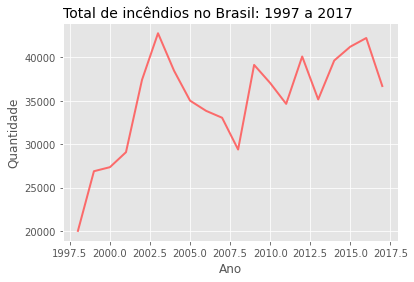

In [ ]:
plt.style.use('ggplot')
plt.title('Total de incêndios no Brasil: 1997 a 2017', fontsize = 14, loc = 'left')
sns.lineplot(data =  analise_ano, x = 'year', y = 'number', estimator = 'sum', lw = 2, color = '#ff5555',alpha = 0.85)
plt.xlabel('Ano')
plt.ylabel('Quantidade')

In [ ]:
#agrupar por ano
analise_mes = base_dados.groupby(by = ['year','month']).sum().reset_index()

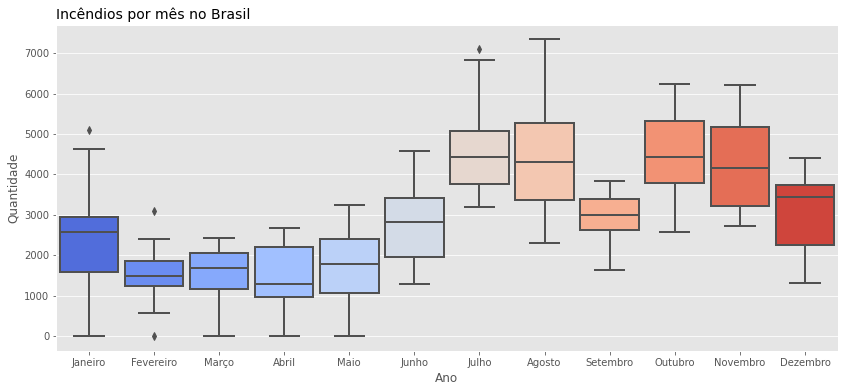

In [ ]:
#para descobrir qual mes tem mais focos de incendio
plt.figure(figsize = (14,6))
plt.title('Incêndios por mês no Brasil', fontsize = 14, loc = 'left')
sns.boxplot(data =  analise_mes, x = 'month', y = 'number', palette = 'coolwarm', saturation = 1, width =0.9, linewidth=2,
            order = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio','Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
            )
plt.xlabel('Ano')
plt.ylabel('Quantidade');

In [ ]:
#avaliar qual estado teve mais incêndios
analise_estado = base_dados.groupby(by = ['state']).sum().reset_index()[['state','number']].sort_values('number',ascending = False)

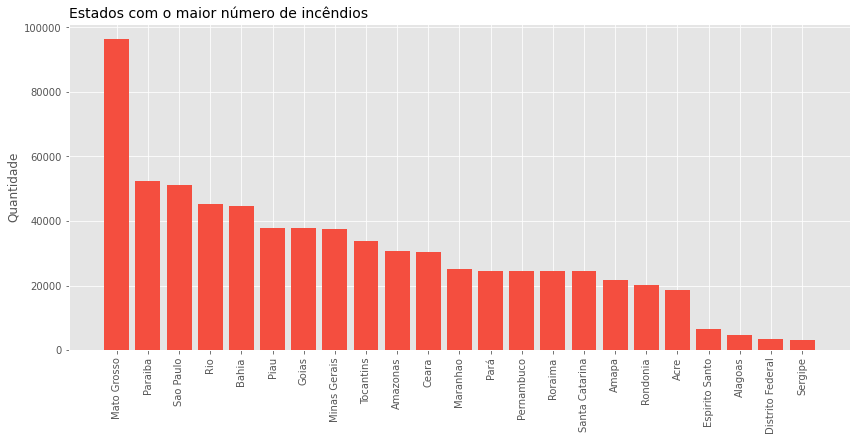

In [ ]:
#plotando a análise dos estados
plt.figure(figsize = (14,6))
plt.title('Estados com o maior número de incêndios', fontsize = 14, loc = 'left')
plt.bar(analise_estado.state, analise_estado['number'],color = '#f44e3f')
plt.ylabel('Quantidade');
plt.xticks(rotation = 90);

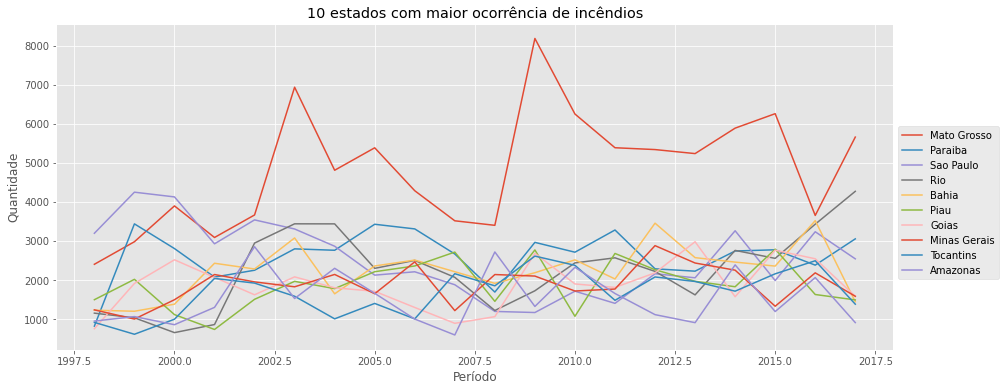

In [ ]:
#analisar serie temporal dos estados
top10_estados = analise_estado['state'][:10].values
plt.figure(figsize = (15,6))
plt.title('10 estados com maior ocorrência de incêndios')

#loop para plotar os estados
for coluna in top10_estados:
  filtro = base_dados.loc[base_dados['state']==coluna]
  analise_local = filtro.groupby(by = 'year').sum().reset_index()
  sns.lineplot(data = analise_local, x= 'year', y = 'number')

plt.ylabel('Quantidade');
plt.xlabel('Período');

#legenda
plt.legend(top10_estados, bbox_to_anchor = (1,0.7))

In [ ]:
#plot geográfico

Estados = analise_estado.sort_values('state')['state'].values
valores = analise_estado.sort_values('state')['number'].values

# Latitudes
Lat = [ -8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,	
       -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25 ]

# Longitudes
Lon = [ -70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,	
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]

#dicionario com esses valores
dicionario = {
    'Estados' : Estados,
    'Latitude' : Lat,
    'Longitude' : Lon,
    'Incêndios' : valores
}

#lendo o dicionário
analise_geografica = pd.DataFrame(dicionario)

    


In [ ]:
import plotly.express as px
#mapa de calor geográfico
px.density_mapbox(
    analise_geografica,
    lat = 'Latitude',
    lon = 'Longitude',
    z = 'Incêndios',
    radius = 30,
    center = dict(lat = -12.700, lon = -46.5555),
    zoom = 3,
    mapbox_style = 'stamen-terrain'

)